In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json
import ast
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

## Read train data and print its info

In [2]:
train_df = pd.read_csv('train.csv')
train=train_df.copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [3]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0105217,en,Scarface,"When an alien force wages war on Earth, only t...",NaN,...,9/10/15,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Fantastic Four,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe47bfc3a36847f8146241', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


## Read test data and print its info

In [4]:
test_df = pd.read_csv('test.csv')
test=test_df.copy()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [5]:
test.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
count,4398.000000,877,4.398000e+03,4382,1420,4398,4398,4398,4384,4398.000000,...,4296,4397,4394.000000,4356,4396,3535,4395,4005,4385,4376
unique,NaN,556,NaN,1101,1402,4398,39,4353,4383,NaN,...,458,3289,NaN,526,3,3529,4342,3885,4365,4376
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.thehungergames.movie/,tt0082748,en,Cinderella,No overview found.,NaN,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",9/9/11,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love is a force of nature.,Beowulf,"[{'id': 187056, 'name': 'woman director'}]",[],"[{'credit_id': '57deba7cc3a36813080070c8', 'de..."
freq,NaN,10,NaN,348,3,1,3776,2,2,NaN,...,2587,7,NaN,2704,4389,2,2,30,21,1
mean,5199.500000,NaN,2.264929e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.550230,...,NaN,NaN,107.622212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1269.737571,NaN,3.689991e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.209014,...,NaN,NaN,21.058290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3001.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4100.250000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.895186,...,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5199.500000,NaN,7.450000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.482241,...,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6298.750000,NaN,2.800000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.938524,...,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train['train']=1
test['train']=0
test['revenue']=0
combined=pd.concat([train, test], ignore_index=True)
train=train.drop(columns=['train'])
test=test.drop(columns=['train','revenue'])

## Explore train and test data

In [7]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [8]:
#print number of missing values in each column in train
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [9]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [10]:
#print number of missing values in each column in test
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

### make some plots to visualize existing correlations between revenue and other movie features

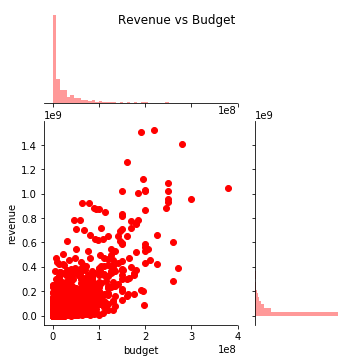

In [11]:
# plot revenue vs budget of train 
sns.jointplot(x="budget", y="revenue", data=train, height=5, ratio=2, color="red")
plt.subplots_adjust(top=0.99)
plt.suptitle('Revenue vs Budget')
plt.show()

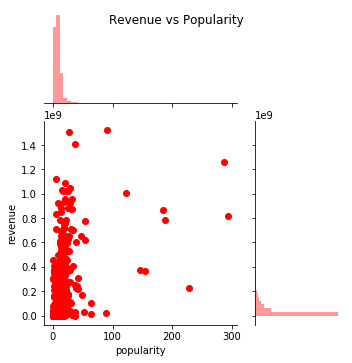

In [12]:
sns.jointplot(x="popularity", y="revenue", data=train, height=5, ratio=2, color="red")
plt.subplots_adjust(top=0.99)
plt.suptitle('Revenue vs Popularity')
plt.show()

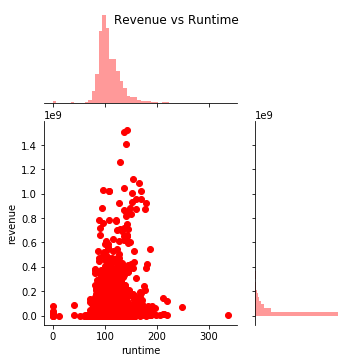

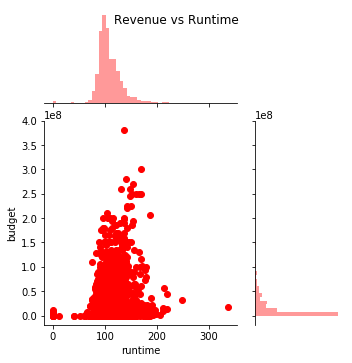

In [13]:
sns.jointplot(x="runtime", y="revenue", data=train, height=5, ratio=2, color="red")
plt.subplots_adjust(top=0.99)
plt.suptitle('Revenue vs Runtime')
plt.show()
sns.jointplot(x="runtime", y="budget", data=train, height=5, ratio=2, color="red")
plt.subplots_adjust(top=0.99)
plt.suptitle('Revenue vs Runtime')
plt.show()

No handles with labels found to put in legend.


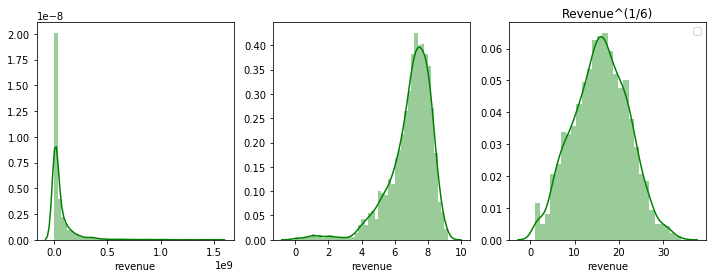

In [20]:
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(train.revenue,ax=ax1,color='g')
sns.distplot(np.log10(train.revenue),ax=ax2,color='g')
sns.distplot(np.power(train.revenue,1/6),ax=ax3,color='g')
plt.title('Revenue^(1/6)')

In [21]:
# train['day']=train['release_date'].str.split("/").apply(lambda x : int(x[0]))
train[['release_month','release_day','release_year']]=train['release_date'].\
str.split('/',expand=True).replace(np.nan, -1).astype(int)
train['release_year']=train['release_year'].apply(lambda x: x+2000 if x<19 else x+1900)
train['release_dayofweek']=pd.to_datetime(train['release_date']).dt.dayofweek
train['release_quarter']=pd.to_datetime(train['release_date']).dt.quarter
train[['release_month','release_day','release_year','release_dayofweek','release_quarter']].head()

,release_month,release_day,release_year,release_dayofweek,release_quarter
0,2,20,2015,4,1
1,8,6,2004,4,3
2,10,10,2014,4,4
3,3,9,2012,4,1
4,2,5,2009,3,1


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

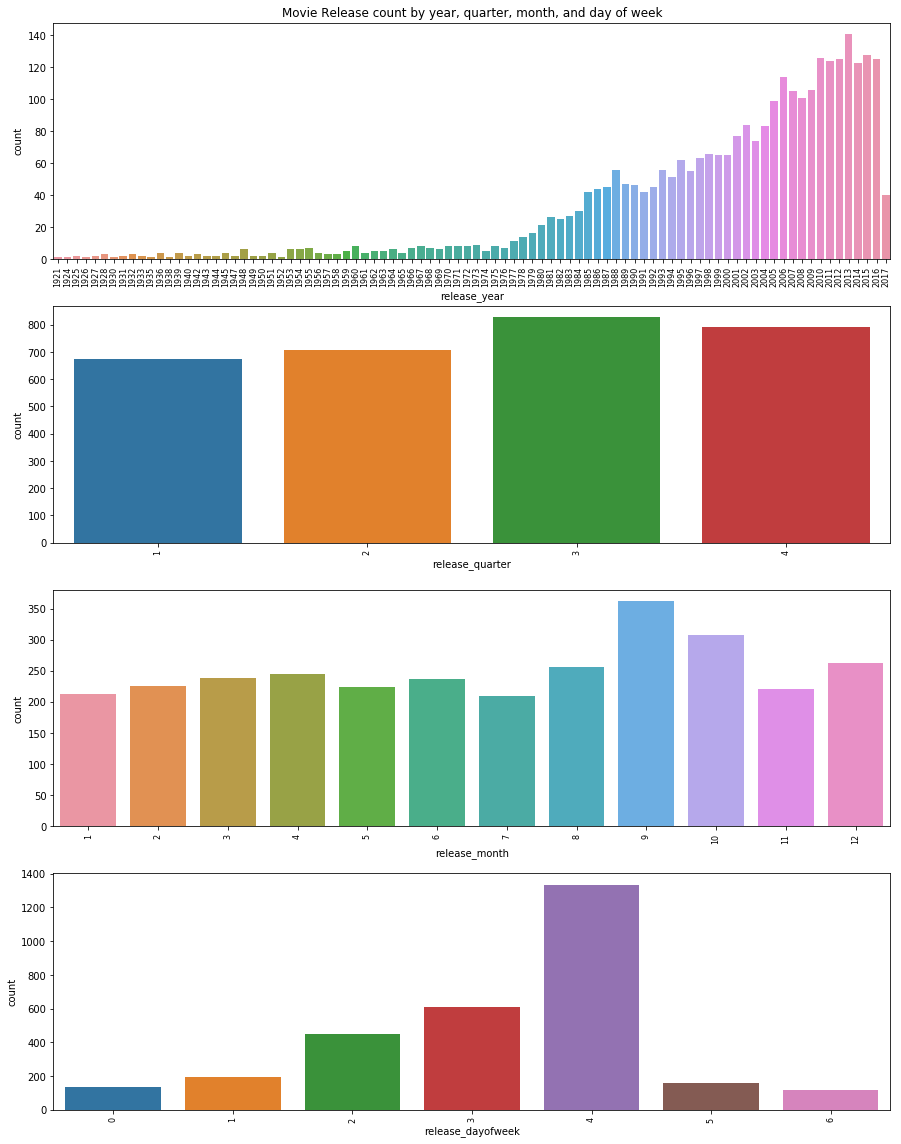

In [22]:
fig=plt.figure(figsize=(15,20))
ax1=fig.add_subplot(411)
# plt.bar(train.groupby('release_year')['revenue'].count().index,train.groupby('release_year')['revenue'].count())
sns.countplot(train['release_year'].sort_values())
loc, labels = plt.xticks()
plt.xticks(fontsize=8,rotation=90)
plt.title("Movie Release count by year, quarter, month, and day of week",fontsize=12)

ax2=fig.add_subplot(412)
sns.countplot(train['release_quarter'].sort_values())
loc, labels = plt.xticks()
plt.xticks(fontsize=8,rotation=90)

ax2=fig.add_subplot(413)
sns.countplot(train['release_month'].sort_values())
loc, labels = plt.xticks()
plt.xticks(fontsize=8,rotation=90)

ax2=fig.add_subplot(414)
sns.countplot(train['release_dayofweek'].sort_values())
loc, labels = plt.xticks()
plt.xticks(fontsize=8,rotation=90)




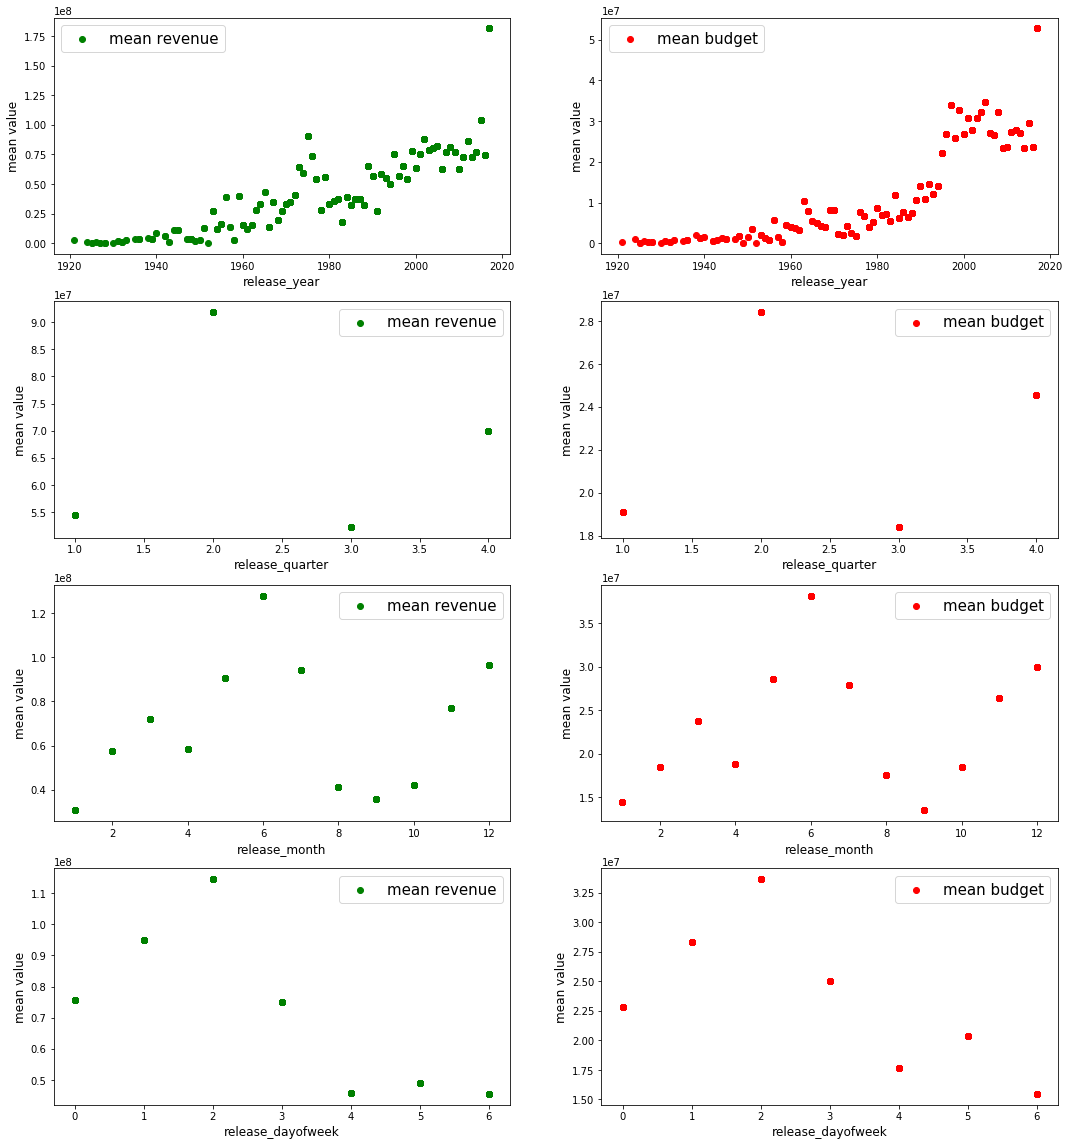

In [23]:
# calculate mean revenue by year, quarter, month, and dayofweek
for column in ['release_year','release_quarter','release_month','release_dayofweek']:
    temp_list=train.groupby(column)['revenue'].mean()
    train['mean_revenue_by_'+column]=train[column].apply(lambda x: temp_list[x])
    
# calculate mean budget by year, quarter, month, and dayofweek
for column in ['release_year','release_quarter','release_month','release_dayofweek']:
    temp_list=train.groupby(column)['budget'].mean()
    train['mean_budget_by_'+ column]=train[column].apply(lambda x: temp_list[x])

fig=plt.figure(figsize=(18,20))
i=421
for column in ['release_year','release_quarter','release_month','release_dayofweek']:
    ax1=fig.add_subplot(i)
    plt.scatter(train[column],train['mean_revenue_by_'+column],color='green',label='mean revenue')
    plt.ylabel('mean value',fontsize=12)
    plt.xlabel(column,fontsize=12)
    plt.legend(fontsize=15)
    i+=1
    ax2=fig.add_subplot(i)
    plt.scatter(train[column],train['mean_budget_by_'+column],color='red',label='mean budget')
    plt.ylabel('mean value',fontsize=12)
    plt.xlabel(column,fontsize=12)
    plt.legend(fontsize=15)
    i+=1

plt.show()

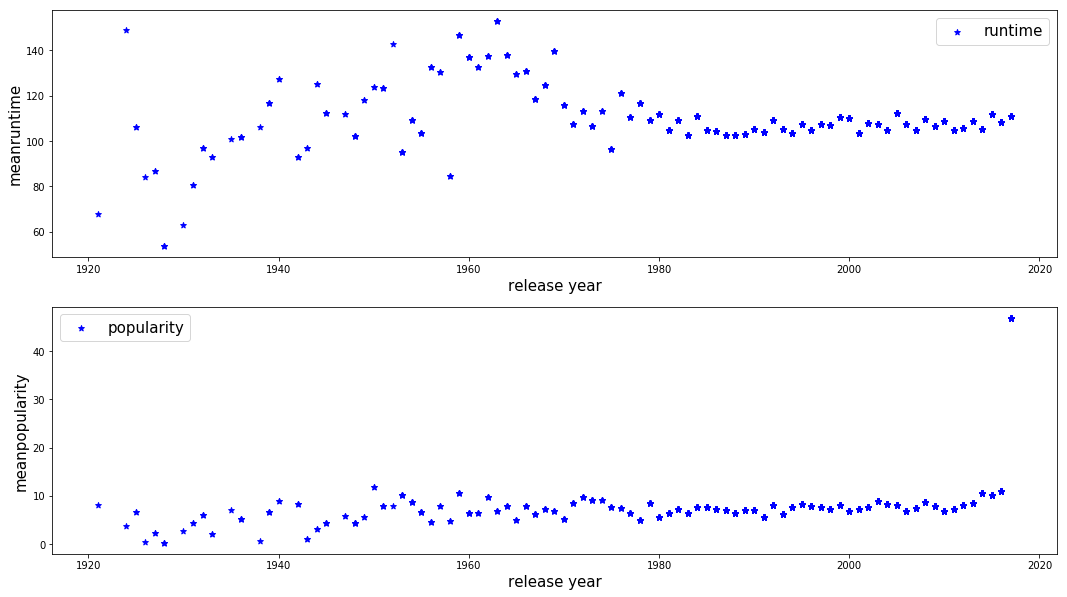

In [24]:
#calculate mean runtime , popularity by year
for i in ['runtime','popularity']:
    for column in ['release_year']:
        temp_list=train.groupby(column)[i].mean()
        train['mean_'+i+'_by_'+ column]=train[column].apply(lambda x: temp_list[x])

fig=plt.figure(figsize=(18,10))
j=211
for i in ['runtime','popularity']:
    ax1=fig.add_subplot(j)
    plt.scatter(train['release_year'],train['mean_'+i+'_by_release_year'],color='blue',marker="*",label=i)
    plt.ylabel('mean'+i,fontsize=15)
    plt.xlabel('release year',fontsize=15)
    plt.legend(fontsize=15)
    j+=1

In [25]:
# all the functions defined for data cleaning, manipulation, and feature engineering
def str_to_list(x):
    try:
        return ast.literal_eval(x)
    except:
        return 0
    
def column_decoder(row,item):
    value=0
    try:
        for dic in row:
            if dic['name'] == item:
                value= 1
                break
    except: 
        pass   
    return value

# #convert type of categorical columns from str to list using str_to_list function
# columns_to_convert=['genres','production_companies','production_countries',
#                     'belongs_to_collection','spoken_languages',
#                     'homepage','Keywords', 'cast', 'crew']
# # convert all the columns with json format, and pass on empty rows 
# for df in [train,test]:
#     for column in columns_to_convert:
#         try:
#             df[column]=df[column].apply(str_to_list)
#         except:
#             pass


{'Comedy': 1028, 'Drama': 1531, 'Family': 260, 'Romance': 571, 'Thriller': 789, 'Action': 741, 'Animation': 141, 'Adventure': 439, 'Horror': 301, 'Documentary': 87, 'Music': 100, 'Crime': 469, 'Science Fiction': 290, 'Mystery': 225, 'Foreign': 31, 'Fantasy': 232, 'War': 100, 'Western': 43, 'History': 132, 'TV Movie': 1}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

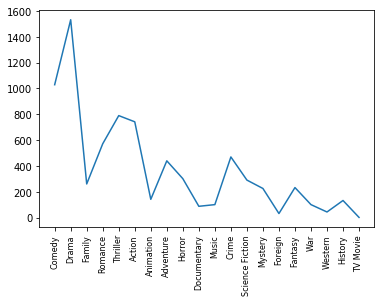

In [26]:
#create new column for each genre
train['genres2']=train['genres'].apply(str_to_list)
genres_dict={}
for row in train['genres2']:
        try:
            for dic in row:
                if dic['name'] not in genres_dict:
                    genres_dict[dic['name']]=1
                else:
                    genres_dict[dic['name']]+=1
        except:
            pass
print(genres_dict)

for genre in genres_dict:
    train[genre]=train['genres2'].apply(lambda x: column_decoder(x,genre))
plt.plot(genres_dict.keys(),genres_dict.values())  
plt.xticks(fontsize=8,rotation=90)

{'Adventure': 677, 'Animation': 241, 'Family': 415, 'Fantasy': 396, 'Horror': 434, 'Science Fiction': 454, 'Comedy': 1577, 'Romance': 864, 'Drama': 2145, 'War': 143, 'Mystery': 325, 'History': 163, 'Documentary': 134, 'Thriller': 1080, 'Action': 994, 'Music': 167, 'Crime': 615, 'Western': 74, 'Foreign': 53}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

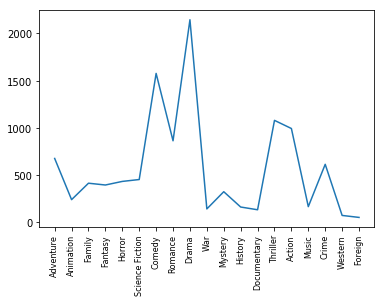

In [27]:
#create new column for each genre
test['genres2']=test['genres'].apply(str_to_list)
genres_dict={}
for row in test['genres2']:
        try:
            for dic in row:
                if dic['name'] not in genres_dict:
                    genres_dict[dic['name']]=1
                else:
                    genres_dict[dic['name']]+=1
        except:
            pass
print(genres_dict)

for genre in genres_dict:
    test[genre]=test['genres2'].apply(lambda x: column_decoder(x,genre))
plt.plot(genres_dict.keys(),genres_dict.values())  
plt.xticks(fontsize=8,rotation=90)    

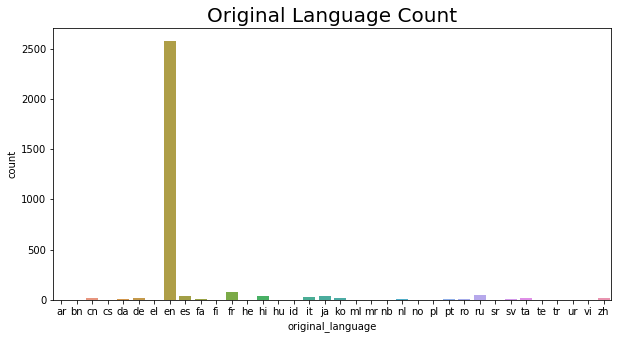

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(train['original_language'].sort_values())
plt.title("Original Language Count",fontsize=20)
plt.show()

In [29]:
print("train:\n",train['status'].value_counts())
print('-'*40)
print("test:\n",test['status'].value_counts())

train:
 Released    2996
Rumored        4
Name: status, dtype: int64
----------------------------------------
test:
 Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64


In [30]:
train.loc[train['status'] == "Rumored"][['status','revenue']]

,status,revenue
609,Rumored,273644
1007,Rumored,60
1216,Rumored,13418091
1618,Rumored,229000


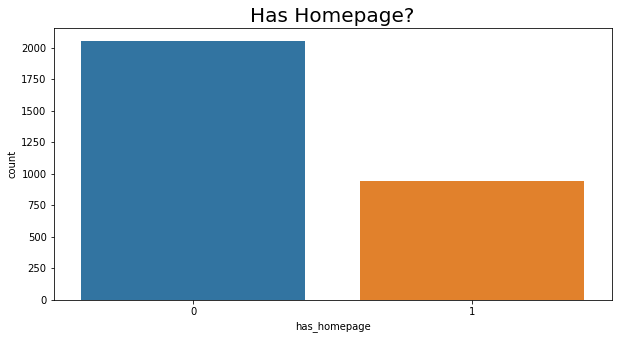

In [31]:
train['has_homepage'] = 1
train.loc[pd.isnull(train['homepage']) ,"has_homepage"] = 0
plt.figure(figsize=(10,5))
sns.countplot(train['has_homepage'].sort_values())
plt.title("Has Homepage?",fontsize=20)
plt.show()

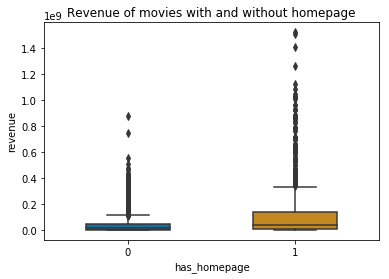

In [38]:
# sns.catplot(x="has_homepage", y="revenue", data=train)
plt.figure()
plt.title('Revenue of movies with and without homepage');
# train.boxplot(by='has_homepage', column=['revenue'], grid=False)
bplot = sns.boxplot(y='revenue', x='has_homepage', 
                 data=train, 
                 width=0.5,
                 palette="colorblind")

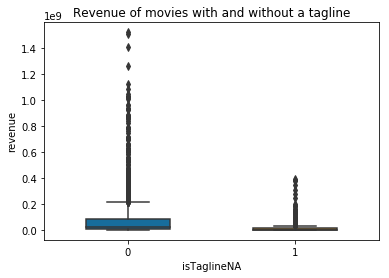

In [40]:
train['isTaglineNA'] = 0
train.loc[pd.isnull(train['tagline']) ,"isTaglineNA"] = 1
plt.title('Revenue of movies with and without a tagline');
bplot = sns.boxplot(y='revenue', x='isTaglineNA', 
                 data=train, 
                 width=0.5,
                 palette="colorblind")

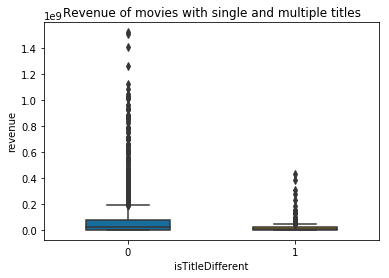

In [44]:
train['isTitleDifferent'] = 1
train.loc[ train['original_title'] == train['title'] ,"isTitleDifferent"] = 0 

plt.title('Revenue of movies with single and multiple titles');
bplot = sns.boxplot(y='revenue', x='isTitleDifferent', 
                 data=train, 
                 width=0.5,
                 palette="colorblind")

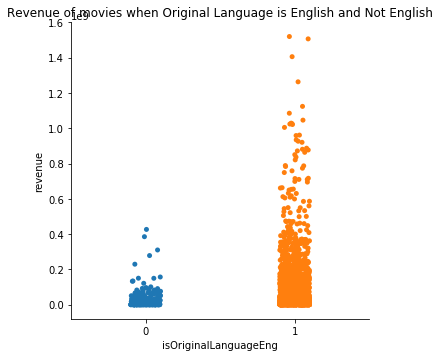

In [43]:
train['isOriginalLanguageEng'] = 0 
train.loc[ train['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
sns.catplot(x="isOriginalLanguageEng", y="revenue", data=train)
plt.title('Revenue of movies when Original Language is English and Not English');

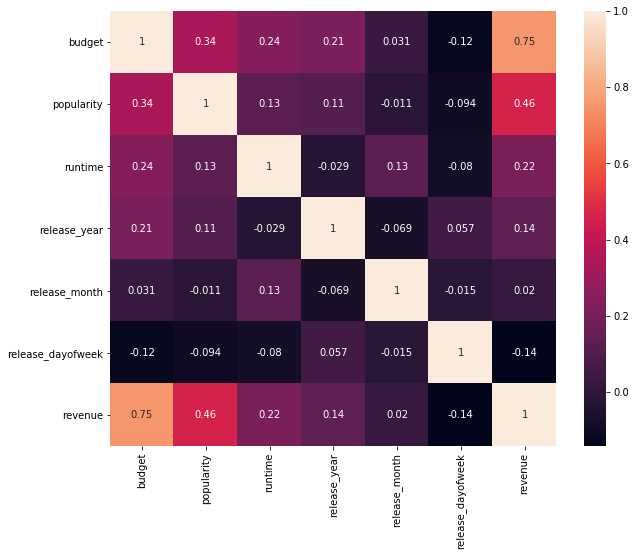

In [45]:
train_mina = train[['budget','popularity','runtime','release_year','release_month','release_dayofweek','revenue']]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_mina.corr(), annot=True)
plt.show()

In [46]:
def count_by_key_value(row,key,value):
    c=0
    try:
        for dic in row:
            if dic[key] == value:
                c+= 1
    except: 
        pass   
    return c
train['crew2']=train['crew'].apply(str_to_list)
train['cast2']=train['cast'].apply(str_to_list)
for i in [0,1,2]:
    train['gender_'+str(i)+'_cast']=train['cast2'].apply(lambda x: count_by_key_value(x,'gender',i) )    
    train['gender_'+str(i)+'_crew']=train['crew2'].apply(lambda x: count_by_key_value(x,'gender',i) )
    
    

In [ ]:
#calculate mean runtime , popularity by year
for i in ['runtime','popularity']:
    for column in ['release_year']:
        temp_list=train.groupby(column)[i].mean()
        train['mean_'+i+'_by_'+ column]=train[column].apply(lambda x: temp_list[x])

In [ ]:
train['_popularity_mean_year_'] = train['popularity'] / train.groupby("release_year")["popularity"].transform('mean')


In [ ]:
train[['_popularity_mean_year_','mean_popularity_by_release_year','popularity']].head()

In [ ]:
df=train.copy()
df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].transform('mean')
df['meanruntimeByYear']